<a href="https://colab.research.google.com/github/AlphardXyl/Algorithms-of-Foundation-Models/blob/main/testmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import safetensors
from safetensors.torch import load_file, save_file
from safetensors import safe_open

path = '/content/drive/MyDrive/Colab Notebooks/Qwen1.5-0.5B-Chat/model.safetensors'
model1 = load_file(path)

In [ ]:
torch.save(model1, 'test.bin')

In [ ]:
model2 = torch.load("test.bin")

In [ ]:
!pip install optimum[exporters]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.4/418.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB

In [ ]:
!optimum-cli export onnx --model Qwen/Qwen2-0.5B Qwen_onnx/

2024-06-20 09:27:21.465996: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 09:27:21.466093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 09:27:21.600880: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 09:27:21.854476: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 09:27:25.008481: W tensorflow/compiler/tf2

In [ ]:
!pip install optimum[exporters-tf]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 443.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 259.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB ? eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB ? eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.

In [ ]:
!optimum-cli export tflite --model facebook/opt-1.3b --sequence_length 128 opt_tflite/

2024-06-20 10:36:48.908886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-20 10:36:59.499755: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All model checkpoint layers were used when initializing TFOPTForCausalLM.

All the layers of TFOPTForCausalLM were initialized from the model checkpoint at facebook/opt-1.3b.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOPTForCausalLM for predictions without further training.
generation_config.json: 100% 137/137 [00:00<00:00, 431kB/s]
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", 

In [ ]:
import onnx
import onnx.helper
import onnx.parser
import onnx.shape_inference

# output the inferred model to the original model path
#onnx_model = onnx.shape_inference.infer_shapes_path("./Qwen2_onnx/model.onnx_data")
onnx_model = onnx.load("/content/Qwen_onnx/model.onnx")
check = onnx.checker.check_model("/content/Qwen_onnx/model.onnx")
print('Check: ', check)

Check:  None


In [ ]:
# 导入onnxruntime
import onnxruntime
# 需要进行推理的onnx模型文件名称
onnx_file_name = "/content/Qwen_onnx/model.onnx"

# onnxruntime.InferenceSession用于获取一个 ONNX Runtime 推理器
ort_session = onnxruntime.InferenceSession(onnx_file_name)

# 构建字典的输入数据，字典的key需要与我们构建onnx模型时的input_names相同
# 输入的input_img 也需要改变为ndarray格式
ort_inputs = {'input': input_img}
# 我们更建议使用下面这种方法,因为避免了手动输入key
# ort_inputs = {ort_session.get_inputs()[0].name:input_img}

# run是进行模型的推理，第一个参数为输出张量名的列表，一般情况可以设置为None
# 第二个参数为构建的输入值的字典
# 由于返回的结果被列表嵌套，因此我们需要进行[0]的索引
ort_output = ort_session.run(None,ort_inputs)[0]
# output = {ort_session.get_outputs()[0].name}
# ort_output = ort_session.run([output], ort_inputs)[0]

In [ ]:
#!pip install autoawq
#!pip install accelerate
#!pip install bitsandbytes
#import bitsandbytes
#import accelerate

In [ ]:
import torch
import torchvision
from transformers import AutoTokenizer, AutoModelForCausalLM

path = '/content/drive/MyDrive/Colab Notebooks/Qwen1.5-0.5B-Chat'
tokenizer = AutoTokenizer.from_pretrained(path)
model = AutoModelForCausalLM.from_pretrained(path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
device = "cpu"

prompt = "关羽不斩老幼，为什么不派十万老幼去斩杀关羽？"
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)
model_inputs = tokenizer([text], return_tensors="pt").to(device)

generated_ids = model.generate(
    model_inputs.input_ids,
    max_new_tokens=512
)
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
]

response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [ ]:
response

'《三国演义》中记载了关羽被曹操手下将领张飞所杀害，但并没有明确说明为什么他不愿意亲自去斩杀关羽。根据当时的实际情况，关羽在汉朝时期就已经去世，此时的张飞可能还没有准备好面对强大的对手。此外，由于当时的历史背景和文化背景，人们对于生死的态度也有所不同，因此关羽不愿意亲自去斩杀关羽也不排除有其他原因。\n\n另外，《三国演义》中的描述也可能与一些历史事件有关。例如，在历史上，关羽曾经是刘备的主要将领之一，负责围困曹操的南郡地区，但最终却因病而败亡，他的事迹一直被后人所传颂。因此，如果关羽真的没有亲自去斩杀关羽，那他可能会留下更多的故事给后来的人们。然而，这种假设需要更多的历史信息来支持，否则可能是无稽之谈。'

In [ ]:
#from transformers import onnx
#!python -m transformers.onnx --help
#!python -m transformers.onnx --model=Qwen/Qwen1.5-0.5B-Chat path
#onnx.convert.export(tokenizer, model, model.config, 21, path)

In [ ]:
!pip install diffusers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [ ]:
import torch
from diffusers import (
    StableDiffusionXLPipeline,
    KDPM2AncestralDiscreteScheduler,
    AutoencoderKL
)

# Load VAE component
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)

# Configure the pipeline
pipe = StableDiffusionXLPipeline.from_pretrained(
    "Corcelio/mobius",
    vae=vae,
    torch_dtype=torch.float16
)
pipe.scheduler = KDPM2AncestralDiscreteScheduler.from_config(pipe.scheduler.config)
#pipe.to('cuda')

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipe.to('cuda:0')

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.29.1",
  "_name_or_path": "Corcelio/mobius",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "KDPM2AncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
# Define prompts and generate image
prompt = "cat sleeping under sunshine, best quality, realistic"
negative_prompt = "ugly, low quality, bad hand shape"

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    width=1024,
    height=1024,
    guidance_scale=7,
    num_inference_steps=50,
    clip_skip=3
).images[0]


image.save("generated_image.png")

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


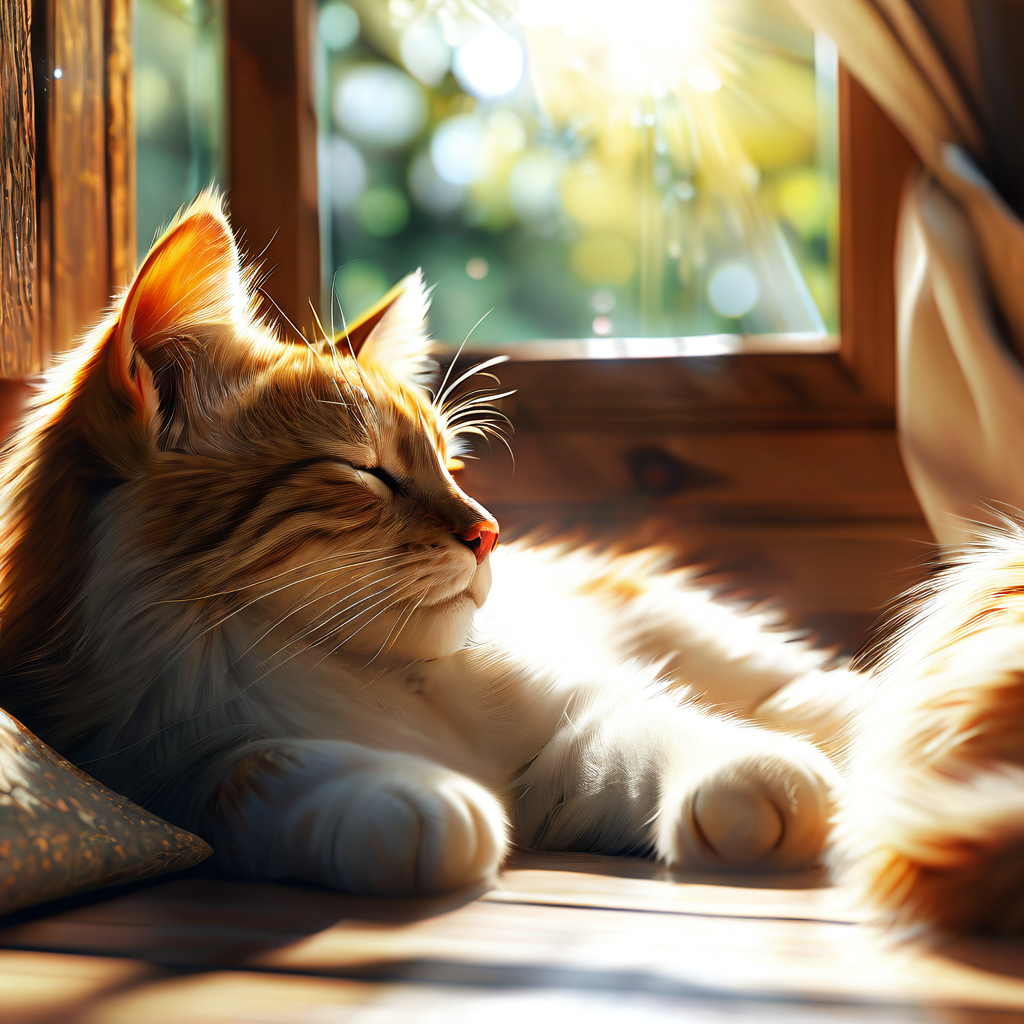

In [ ]:
image

In [ ]:
!git clone https://github.com/ModelTC/llmc

Cloning into 'llmc'...
remote: Enumerating objects: 545, done.
remote: Counting objects: 100% (453/453), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 545 (delta 279), reused 417 (delta 251), pack-reused 92
Receiving objects: 100% (545/545), 4.17 MiB | 13.95 MiB/s, done.
Resolving deltas: 100% (303/303), done.


In [ ]:
!git clone https://huggingface.co/facebook/opt-1.3b

Cloning into 'opt-1.3b'...
remote: Enumerating objects: 88, done.
remote: Total 88 (delta 0), reused 0 (delta 0), pack-reused 88 (from 1)
Unpacking objects: 100% (88/88), 553.41 KiB | 1.76 MiB/s, done.
Filtering content: 100% (3/3), 7.35 GiB | 33.43 MiB/s, done.


In [ ]:
%cd /content/opt-1.3b
!git lfs pull

/content/opt-1.3b


In [ ]:
!pip install -r /content/llmc/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 50.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86

In [ ]:
!mkdir /content/llmc/tools/eval
!mkdir /content/llmc/tools/calib
!python /content/llmc/tools/download_eval_dataset.py --save_path /content/llmc/tools/eval
!python /content/llmc/tools/download_calib_dataset.py --save_path /content/llmc/tools/calib

2024-06-27 03:14:36.766 | INFO     | __main__:<module>:40 - args : Namespace(dataset_name=['c4', 'wikitext2', 'ptb'], save_path='/content/llmc/tools/eval')
Generating validation split: 45576 examples [00:01, 29225.91 examples/s]
Saving the dataset (1/1 shards): 100% 45576/45576 [00:00<00:00, 236938.19 examples/s]
2024-06-27 03:14:51.689 | INFO     | __main__:download:20 - download c4 for eval finished.
Generating test split: 100% 4358/4358 [00:00<00:00, 314858.18 examples/s]
Generating train split: 100% 36718/36718 [00:00<00:00, 490414.87 examples/s]
Generating validation split: 100% 3760/3760 [00:00<00:00, 416352.05 examples/s]
Saving the dataset (1/1 shards): 100% 4358/4358 [00:00<00:00, 590896.00 examples/s]
2024-06-27 03:15:03.077 | INFO     | __main__:download:25 - download wikitext2 for eval finished.
The repository for ptb_text_only contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ptb_text

In [ ]:
!PYTHONPATH=/content/llmc:$PYTHONPATH
%cd /content/llmc
!python -m llmc --config /content/llmc/configs/quantization/QUIK/quik_w4a4_fakequant_eval.yml

/content/llmc
2024-06-27 03:38:02.317 | INFO     | llmc.utils.utils:check_config:53 - Tokenizer_mode is set to slow.
2024-06-27 03:38:02.318 | INFO     | __main__:<module>:102 - args: Namespace(config='/content/llmc/configs/quantization/QUIK/quik_w4a4_fakequant_eval.yml')
2024-06-27 03:38:02.318 | INFO     | __main__:<module>:103 - config: {'base': {'seed': 0}, 'model': {'type': 'Opt', 'path': '/content/opt-1.3b', 'torch_dtype': 'auto', 'tokenizer_mode': 'slow'}, 'calib': {'name': 'c4', 'download': False, 'path': '/content/llmc/tools/calib/c4', 'n_samples': 128, 'bs': 1, 'seq_len': 2048, 'preproc': 'c4_gptq', 'seed': 0}, 'eval': {'eval_pos': ['pretrain', 'fake_quant'], 'name': 'wikitext2', 'download': False, 'path': '/content/llmc/tools/eval/wikitext2', 'bs': 1, 'seq_len': 2048}, 'quant': {'method': 'QUIK', 'weight': {'bit': 4, 'symmetric': True, 'granularity': 'per_channel', 'group_size': -1}, 'act': {'bit': 4, 'symmetric': False, 'granularity': 'per_token'}, 'special': {'fp_relative'

In [ ]:
import torch
import torchvision
from transformers import AutoTokenizer, AutoModelForCausalLM

path = '/content/opt-1.3b/real_quant_model'
tokenizer = AutoTokenizer.from_pretrained(path)
#model = AutoModelForCausalLM.from_pretrained(path)


OSError: Incorrect path_or_model_id: '/content/opt-1.3b/real_quant_model'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [ ]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video

pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

prompt = "Spiderman is surfing"
video_frames = pipe(prompt, num_inference_steps=25).frames
video_path = export_to_video(video_frames[0])


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
#video_path = export_to_video(video_frames[0])
video_path

'/tmp/tmp9gaaq1ab.mp4'

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForSpeechToSpeech, SpeechT5HifiGan
from datasets import load_dataset

dataset = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation")
dataset = dataset.sort("id")
sampling_rate = dataset.features["audio"].sampling_rate
example_speech = dataset[0]["audio"]["array"]

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_vc")
model = SpeechT5ForSpeechToSpeech.from_pretrained("microsoft/speecht5_vc")
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

inputs = processor(audio=example_speech, sampling_rate=sampling_rate, return_tensors="pt")

# load xvector containing speaker's voice characteristics from a file
import numpy as np
#import torch
#speaker_embeddings = np.load("xvector_speaker_embedding.npy")
#speaker_embeddings = torch.tensor(speaker_embeddings).unsqueeze(0)


from datasets import load_dataset
embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

import torch
speaker_embeddings = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)


speech = model.generate_speech(inputs["input_values"], speaker_embeddings, vocoder=vocoder)

import soundfile as sf
sf.write("speech.wav", speech.numpy(), samplerate=16000)

The repository for hf-internal-testing/librispeech_asr_demo contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hf-internal-testing/librispeech_asr_demo.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating validation split: 0 examples [00:00, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/621M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/speecht5_vc were not used when initializing SpeechT5ForSpeechToSpeech: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToSpeech from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToSpeech from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToSpeech were not initialized from the model checkpoint at microsoft/speecht5_vc and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizati

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

FileNotFoundError: [Errno 2] No such file or directory: 'xvector_speaker_embedding.npy'